In [1]:
pip install mysql-connector-python 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connection = mysql.connector.connect(host='localhost',
                                         database='workspace',
                                         user='root',
                                         password='Vimala15$')


In [3]:
select_sql_query="show tables"
cursor = connection.cursor()
cursor.execute(select_sql_query)
records = cursor.fetchall()
for x in records:
    print(x,"\n")

('ACCOUNT',) 

('BOOKING',) 

('BUILDING',) 

('PAYMENT',) 

('ROOM',) 

('USER',) 

('WORKSPACE',) 



In [4]:
sql_select_Query = 'SELECT count(booking_id) as Number_of_bookings, monthname(date) as month FROM booking where year(date) = 2021 group by month order by Number_of_bookings desc'
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
df_booking = pd.DataFrame(records, columns = ['Number_of_bookings', 'month'])
df_booking

,Number_of_bookings,month
0,22,May
1,13,July
2,13,November
3,10,December
4,9,October
5,8,June
6,8,September
7,5,February
8,4,March
9,3,April


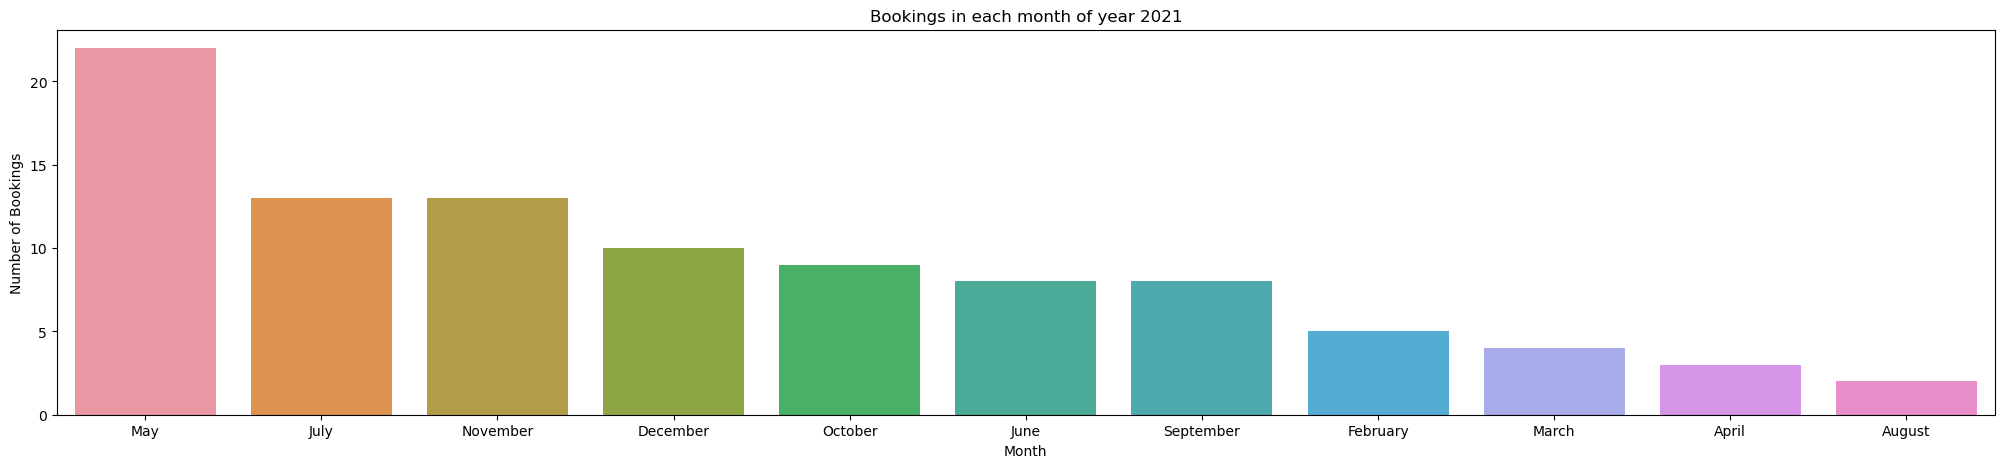

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (25, 5))
 
# creating the bar Chart for Bookings in each month of year 2021
sns.barplot(data = df_booking, x=df_booking['month'], y= df_booking['Number_of_bookings'])
 
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Bookings in each month of year 2021")
plt.show()

In [6]:
sql_select_Query = 'SELECT count(payment_type) as count,payment_type from payment group by payment_type'
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
df_payment = pd.DataFrame(records, columns = ['count', 'payment_type'])
df_payment

,count,payment_type
0,42,Apple Pay
1,50,Credit Card
2,31,Paypal
3,41,GPay
4,34,Debit Card


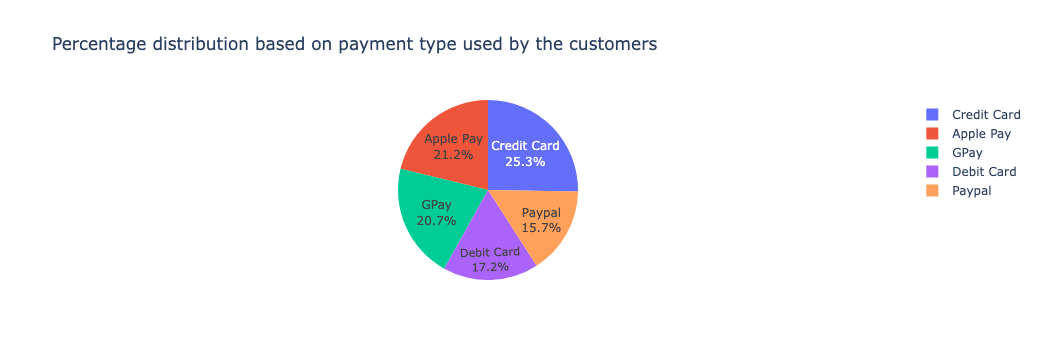

In [11]:
import plotly.express as px 

# creating the pie Chart for Percentage distribution based on payment type used by the customers
fig = px.pie(df_payment, values = 'count', 
             names = 'payment_type', 
             title ='Percentage distribution based on payment type used by the customers')
fig.update_traces(textposition = 'inside', textinfo='percent+label')
fig.show()

In [12]:
sql_select_Query = 'SELECT count(booking_id) as Number_of_bookings,month(date) as month FROM booking where  year(date) = 2021 group by month order by month '
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
df_booking_2021 = pd.DataFrame(records, columns = ['Number_of_Bookings', 'month'])
df_booking_2021

,Number_of_Bookings,month
0,5,2
1,4,3
2,3,4
3,22,5
4,8,6
5,13,7
6,2,8
7,8,9
8,9,10
9,13,11


In [13]:
sql_select_Query1 = 'SELECT count(booking_id) as Number_of_bookings,month(date) as month FROM booking where  year(date) = 2022 group by month order by month'
cursor = connection.cursor()
cursor.execute(sql_select_Query1)
records = cursor.fetchall()
df_booking_2022 = pd.DataFrame(records, columns = ['Number_of_Bookings', 'month'])
df_booking_2022

,Number_of_Bookings,month
0,13,1
1,5,2
2,7,3
3,10,4
4,6,5
5,4,6
6,6,7
7,4,8
8,8,9
9,11,10


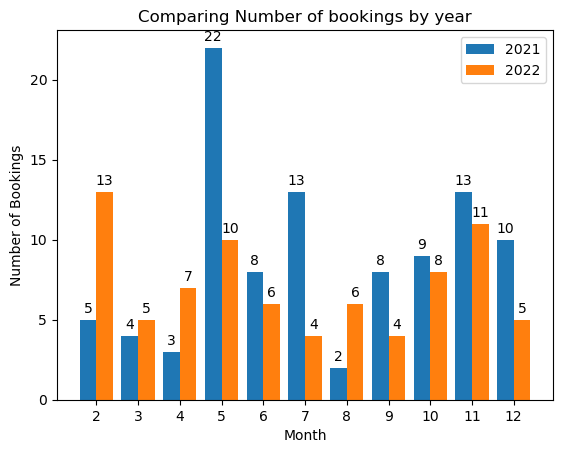

In [19]:
# Comparing Number of bookings by year using bar plot
x_axis = np.arange(len(df_booking_2021['month']))
plt1=plt.bar(x_axis-0.2, df_booking_2021['Number_of_Bookings'],0.4, label='2021')
plt2=plt.bar(x_axis+0.2, df_booking_2022['Number_of_Bookings'],0.4, label='2022')
plt.xticks(x_axis,df_booking_2021['month'])
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Comparing Number of bookings by year")
plt.legend()
plt.bar_label(plt1, padding=3)
plt.bar_label(plt2, padding=3)
plt.show()